<a href="https://colab.research.google.com/github/orinbou/PhysicsPythonColab/blob/main/einstein_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

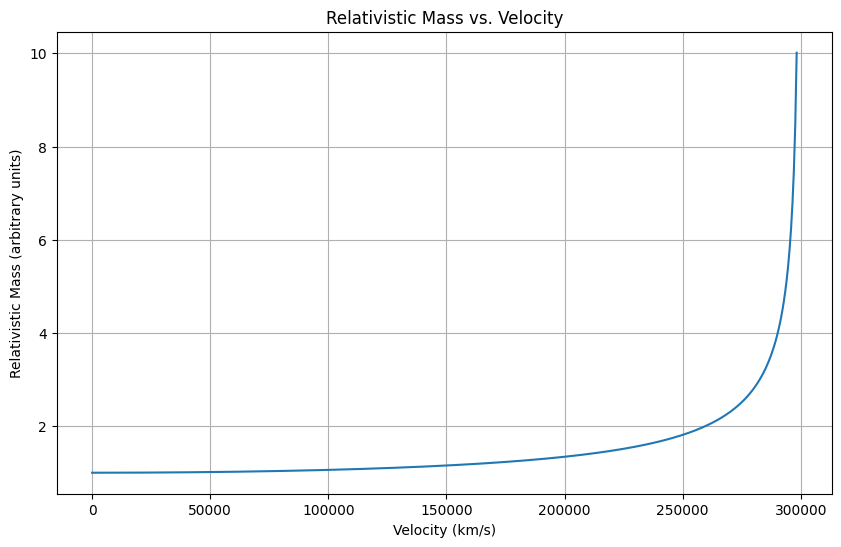

In [12]:
# prompt:
# アインシュタインの特殊相対性理論の一般式（速度がゼロでない場合）を光速は秒速30万km/sとして二次元のグラフで可視化してください。
# 縦軸を質量、横軸を速度としてください。また、グラフのラベルは英語表記としてください。

import numpy as np
import matplotlib.pyplot as plt

# Speed of light in km/s
c = 299792.458

# Rest mass (arbitrary value for demonstration)
m0 = 1.0  # Assume a rest mass of 1 unit

# Define a range of velocities from 0 up to (but not including) the speed of light
# We'll use a small epsilon value to avoid division by zero at v = c
v = np.linspace(0, c * 0.995, 500)  # velocities from 0 to 99.5% of c

# Calculate the relativistic mass
# The formula is m = m0 / sqrt(1 - (v^2 / c^2))
mass = m0 / np.sqrt(1 - (v**2 / c**2))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(v, mass)

# Set labels and title
plt.xlabel('Velocity (km/s)')
plt.ylabel('Relativistic Mass (arbitrary units)')
plt.title('Relativistic Mass vs. Velocity')
plt.grid(True)

# Show the plot
plt.show()

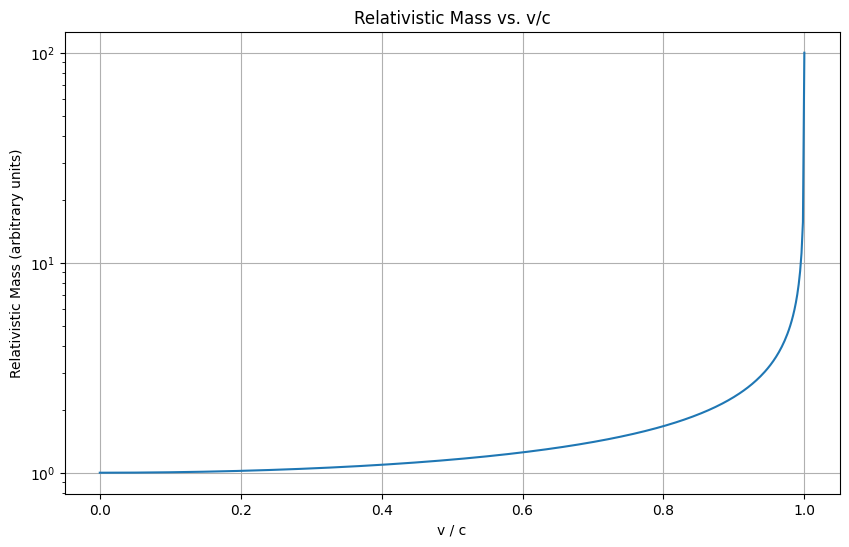

In [13]:
# 横軸を v/c に変更（物理的に自然な無次元量）
# 縦軸を対数スケールに変更（光速付近の急増を見やすく）

import numpy as np
import matplotlib.pyplot as plt

# Speed of light in km/s
c = 299792.458

# Rest mass (arbitrary value for demonstration)
m0 = 1.0

# Velocity range (up to 99.995% of c)
v = np.linspace(0, c * 0.99995, 500)

# Lorentz factor
gamma = 1 / np.sqrt(1 - (v**2 / c**2))

# Relativistic mass
mass = m0 * gamma

# Create the plot
plt.figure(figsize=(10, 6))

# Plot using v/c (dimensionless)
plt.plot(v / c, mass)

# Labels and title (English as requested)
plt.xlabel('v / c')
plt.ylabel('Relativistic Mass (arbitrary units)')
plt.title('Relativistic Mass vs. v/c')
plt.grid(True)

# Log scale for better visualization near c
plt.yscale('log')

plt.show()

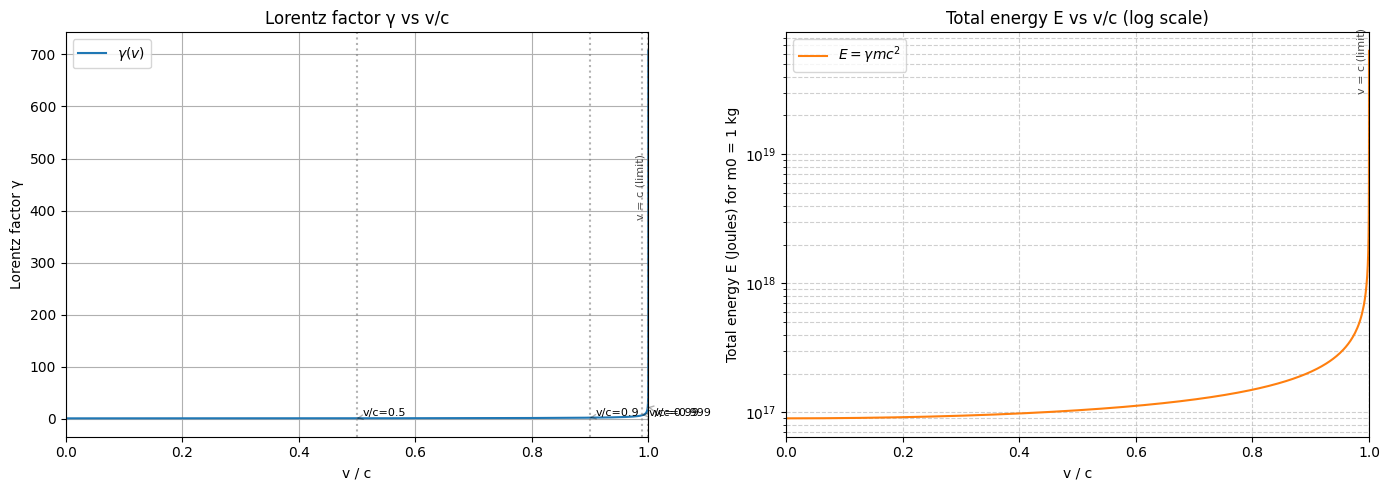

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Choose which c to use:
c_km_s_prompt = 300000.0        # "prompt" value in km/s (as requested)
c_km_s_exact  = 299792.458      # more exact km/s value
# Choose which to use for plots (set to c_km_s_prompt to follow the prompt exactly)
c_km_s = c_km_s_prompt

# Also provide c in m/s for energy (SI)
c_m_s = 299_792_458.0

# Rest mass (choose units)
m0_kg = 1.0  # 1 kg (explicit SI unit) — change as needed

# Velocity grid: use v/c as the x-axis variable (avoid v == c exactly)
v_over_c = np.concatenate([
    np.linspace(0.0, 0.99, 500, endpoint=False),
    np.linspace(0.99, 0.999999, 500)
])
v_km_s = v_over_c * c_km_s
v_m_s = v_over_c * c_m_s  # for SI energy calculation

# Lorentz factor gamma
gamma = 1.0 / np.sqrt(1.0 - (v_m_s**2 / c_m_s**2))

# "Relativistic mass" (not recommended in modern usage) and total energy
relativistic_mass = m0_kg * gamma  # in kg if m0_kg is kg
total_energy_J = gamma * m0_kg * c_m_s**2  # in Joules

# Plotting: show gamma and energy. Use two subplots (linear and log) for clarity.
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: gamma vs v/c (linear y)
axes[0].plot(v_over_c, gamma, label=r'$γ(v)$', color='C0') # Changed label for gamma symbol
axes[0].set_xlabel('v / c')
axes[0].set_ylabel('Lorentz factor γ')
axes[0].set_title('Lorentz factor γ vs v/c')
axes[0].grid(True)
axes[0].set_xlim(0, 1.0)
axes[0].legend()

# Mark some interesting points
for vcs in [0.5, 0.9, 0.99, 0.999]:
    axes[0].axvline(vcs, color='gray', linestyle=':', alpha=0.6)
    axes[0].annotate(f'v/c={vcs}', xy=(vcs, 1.0/(np.sqrt(1-vcs**2))), xytext=(vcs+0.01, 5),
                     arrowprops=dict(arrowstyle='->', alpha=0.3), fontsize=8)

# Right: total energy vs v/c (log scale, in Joules)
axes[1].plot(v_over_c, total_energy_J, label=r'$E = \gamma m c^2$', color='C1') # Fixed label for mathtext parsing
axes[1].set_xlabel('v / c')
axes[1].set_ylabel('Total energy E (Joules) for m0 = 1 kg')
axes[1].set_title('Total energy E vs v/c (log scale)')
axes[1].set_yscale('log')
axes[1].grid(True, which='both', ls='--', alpha=0.6)
axes[1].set_xlim(0, 1.0)
axes[1].legend()

# Vertical line at v = c (as asymptote)
for ax in axes:
    ax.axvline(1.0, color='k', linestyle='--', linewidth=0.8, alpha=0.7)
    ax.text(0.995, ax.get_ylim()[1]*0.6, 'v = c (limit)', rotation=90, fontsize=8,
            verticalalignment='center', horizontalalignment='right', alpha=0.7)

plt.tight_layout()
plt.show()